In [127]:
import json
import pandas as pd
import matplotlib as plt
pd.options.display.float_format = '{:.2f}'.format 

df = pd.read_json(r'dataset\response_1692132599095.json', dtype='unicode')

In [128]:

#considero que no voy a utilizar estas columnas:
df.drop(columns=['image','last_updated', 'roi', 'ath_date','atl_date',  'high_24h',
                 'low_24h','price_change_24h','price_change_percentage_24h','market_cap_change_24h',
                 'market_cap_change_percentage_24h'], inplace=True)

In [129]:
df.shape

(100, 15)

# Clasificación de las variables

### cuantitativos
* discretos = enteros
* continuos = se divide infinitamente

### cualitativos
* categoricos = de una categoria o clase especifica
* ordinales = de categoria en la que IMPORTA un orden o jerarquía

### Categoricas 

* id
* symbol
* name

### Discretas
* Ninguna

### Continuas  

* current_price 
* market_cap 
* fully_diluted_valuation --> si todas las monedas de una crypto estuvieran en circulacion, es para saber el potencial de una moneda con su valor actual
* total_volume 
* high_24h 
* low_24h
* circulating_supply
* total_supply
* max_supply
* ath
* ath_change_percentage
* atl
* atl_change_percentage
* ath_date
* atl_date
* roi
* price_change_24h
* price_change_percentage_24h
* market_cap_change_24h
* market_cap_change_percentage_24h

### Ordinales 

* market_cap_rank

## Conclusión

No hay variables discretas en mi opinion ya que si bien variables como circulating supply usualmente se refiere a una cantidad espcífica de monedas en circulación, cualquier moneda puede ser separada en partes más pequeñas de forma infinita, hence, es una variable continua.

La gran mayoría de variables son continuas ya que se trata de dinero o cryptos que, como ya dije, pueden dividirse infinitamente.

Cabe recalcar la importancia de la variable ordinal "market_cap_rank" ya que juega un papel muy importante en el mundo de las cryptos aquellas rankeadas en lo alto. Esto se debe a que ganan mayor fama y reconocimiento. Esta fama es incluso mayor si se trata de una crypto que logra mantenerse durante largos periodos de tiempo (años) en dicho ranking. Por ejemplo bitcoin, ethereum, usdt, etc.




In [130]:

df.columns.tolist()

['id',
 'symbol',
 'name',
 'current_price',
 'market_cap',
 'market_cap_rank',
 'fully_diluted_valuation',
 'total_volume',
 'circulating_supply',
 'total_supply',
 'max_supply',
 'ath',
 'ath_change_percentage',
 'atl',
 'atl_change_percentage']

In [131]:
#considero que para poder continuar, debo poner el tipo de dato que corresponde a cada columna

strings= ["id", "symbol", "name"]
floats=['current_price',
 'market_cap',
 'fully_diluted_valuation',
 'total_volume',
 'circulating_supply',
 'total_supply',
 'max_supply',
 'ath',
 'ath_change_percentage',
 'atl',
 'atl_change_percentage']

for i in strings:
    df[i].fillna(0)
    df[i] = df[i].astype("string")

for i in floats:
    df[i].replace('None', pd.NA, inplace=True)
    df[i].fillna(0, inplace=True)
    df[i] = df[i].astype("float")

df["market_cap_rank"] = df["market_cap_rank"].astype("int")

df.dtypes

id                         string[python]
symbol                     string[python]
name                       string[python]
current_price                     float64
market_cap                        float64
market_cap_rank                     int32
fully_diluted_valuation           float64
total_volume                      float64
circulating_supply                float64
total_supply                      float64
max_supply                        float64
ath                               float64
ath_change_percentage             float64
atl                               float64
atl_change_percentage             float64
dtype: object

# Como quiero plantear este EDA

Mi objetivo en este EDA es obtener insights sobre las 10 mejores criptomonedas como potencial inversion para clientes de una empresa.

Este analisis exploratorio de los datos va a estar dividido en dos partes:

* Análisis de Bitcoin y sus altcoins (altcoins = aquellas criptomonedas que no son Bitcoin)

* Análisis de stable coins (aquellas criptomonedas que tienen su valor anclado al dólar)

Este acercamiento se debe a que por un lado el comportamiento de las altcoins es muy diferente al de las stablecoins. Lo que quiero lograr es marcar una diferencia entre aquellas criptos que son más riesgosas pero mucho más volátiles y aquellas que son estables pero que no van a suponer un retorno alto.

In [140]:
#I filter out 
#dfMovies.drop(dfMovies[dfMovies['popularity'] == 'Beware Of Frost Bites'].index, inplace=True)

#df_altcoins=df.drop([df["current_price"]<0.99 or df["current_price"]>1])

df_stablecoins = df[(df["current_price"] > 0.99) & (df["current_price"] < 1)]

df_altcoins = df[~((df["current_price"] >= 0.99) & (df["current_price"] <= 1))] #usar ~ para negar una condicion 
                                                                                #se hace con Alt Gr + (boton de asterisco al lado del enter)


df_altcoins


,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
0,bitcoin,btc,Bitcoin,29188.00,568028572421.00,1,613030688168.00,8708037839.00,19458406.00,21000000.00,21000000.00,69045.00,-57.73,67.81,42944.48
1,ethereum,eth,Ethereum,1828.72,219831455559.00,2,219831455559.00,4367028090.00,120142222.59,120142222.59,NaN,4878.26,-62.49,0.43,422497.63
3,binancecoin,bnb,BNB,237.46,36454739107.00,4,47388081798.00,428728230.00,153856150.00,153856150.00,200000000.00,686.31,-65.48,0.04,594963.06
4,ripple,xrp,XRP,0.61,31993608622.00,5,60608551761.00,1170330739.00,52787284454.00,99988519823.00,100000000000.00,3.40,-82.17,0.00,22453.08
6,staked-ether,steth,Lido Staked Ether,1828.10,14864601623.00,7,14864698334.00,18163482.00,8127993.70,8128046.58,8128046.58,4829.57,-62.14,482.90,278.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,terra-luna,lunc,Terra Luna Classic,0.00,412407630.00,96,484895634.00,39656605.00,5816469461212.38,6838817824102.49,NaN,119.18,-100.00,0.00,6989.28
96,sui,sui,Sui,0.56,406106156.00,97,5615699510.00,60441115.00,723162190.46,10000000000.00,10000000000.00,2.16,-74.04,0.55,1.94
97,gmx,gmx,GMX,45.15,404186632.00,98,598324527.00,13507932.00,8950782.79,8951069.00,13250000.00,91.07,-50.39,11.53,291.74
98,huobi-token,ht,Huobi,2.55,403615196.00,99,509057350.00,9123452.00,159406077.00,201050000.00,201050000.00,39.66,-93.62,0.31,706.88


In [ ]:
df.describe()
#busco informacón relevante que me ayude a comenzar a filtrar ciertas criptomonedas

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,100.00,100.00,100.00,94.00,100.00,100.00,94.00,59.00,100.00,100.00,100.00,100.00
mean,721.44,11488049351.16,50.50,13980617248.20,461684124.80,19874939732617.28,25951602137233.79,24274906399725.91,1776.55,-72.58,89.18,210276.14
std,4112.43,61028154368.70,29.01,67296585881.82,1971337033.15,118509701566272.89,150062096141740.94,139132417167717.22,9838.82,27.44,395.28,1778956.16
min,0.00,388678010.00,1.00,441384570.00,4932.94,162205.43,162205.43,162205.43,0.00,-100.00,0.00,0.16
25%,0.36,546151195.00,25.75,730914557.75,12994067.50,114772901.62,146638777.32,150000000.00,1.33,-93.20,0.02,72.79
50%,1.21,810982594.50,50.50,1300508194.50,37586640.00,783204038.20,1000000000.00,1000000000.00,10.92,-84.18,0.36,439.07
75%,8.03,2952235373.75,75.25,6256661019.75,102651174.75,3561161019.54,9722222222.00,9444444444.00,103.11,-61.82,0.95,4732.87
max,29188.00,568028572421.00,100.00,613030688168.00,16973712754.00,951421714286000.00,999986291211167.00,990000000000000.00,70643.00,-4.54,3139.17,17750599.87


<function matplotlib.pyplot.show(close=None, block=None)>

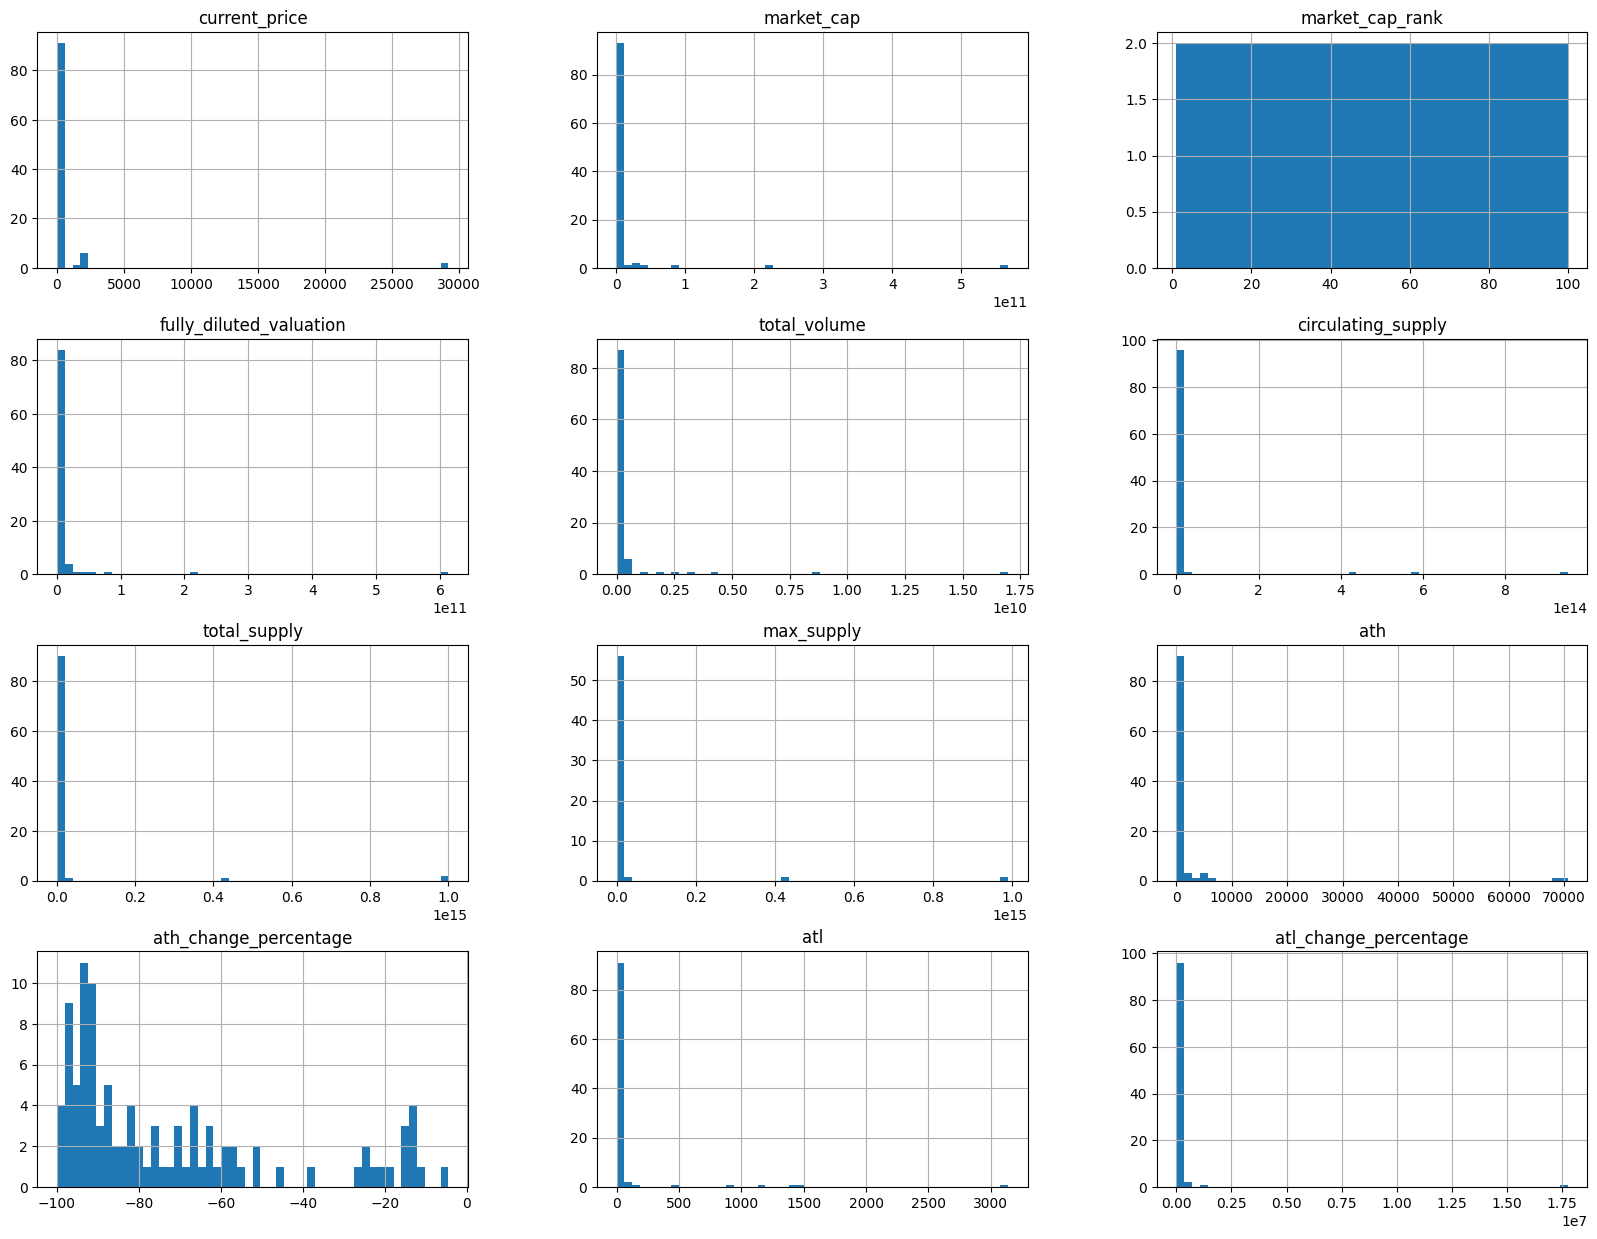

In [ ]:
#df.drop(df[df['name'] == 'Bitcoin'].index, inplace=True)
#df.drop(df[df['name'] == 'Ethereum'].index, inplace=True)


#Plot histograms of numerical data
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20,15))
plt.show